In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [230]:
df = pd.read_excel('Online Retail.xlsx')

In [231]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [233]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Clean the data

In [234]:
# Drop rows with InvoiceNo starting with 'C' (Indicates cancelled orders)

df = df[~(df['InvoiceNo'].str.startswith('C') == True)]

In [235]:
# Drop rows with negative quantity

df = df[df['Quantity'] > 0]

In [236]:
# Update price for rows with 0 unit price with most frequent price for that product

price_mapping = df[df['UnitPrice'] > 0].groupby('StockCode')['UnitPrice'].agg(lambda x: x.mode()[0])

df.loc[df['UnitPrice'] == 0, 'UnitPrice'] = df[df['UnitPrice'] == 0]['StockCode'].map(price_mapping)

In [237]:
df.dropna(subset=['UnitPrice'], inplace=True)

In [238]:
# Fill Nan descriptions with most frequent description for that product

description_mapping = df[~df['Description'].isna()].groupby('StockCode')['Description'].agg(lambda x: x.mode()[0])
df.loc[df['Description'].isna(), 'Description'] = df[df['Description'].isna()]['StockCode'].map(description_mapping)

In [239]:
# Convert CustomerID column to string type, leaving NaN values as is

df['CustomerID'] = df['CustomerID'].apply(lambda x: str(x) if pd.notna(x) else np.nan)

In [240]:
# Remove duplicated rows

df = df[~(df.duplicated() == True)]

Sales Performance Analysis

In [241]:
# Create a TotalSales column

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [242]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalSales'].sum().reset_index()
monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['TotalSales'].sum().reset_index()

In [243]:
df = df[~(df['InvoiceNo'].str.startswith('A') == True)]

In [244]:
df.reset_index(inplace=True)

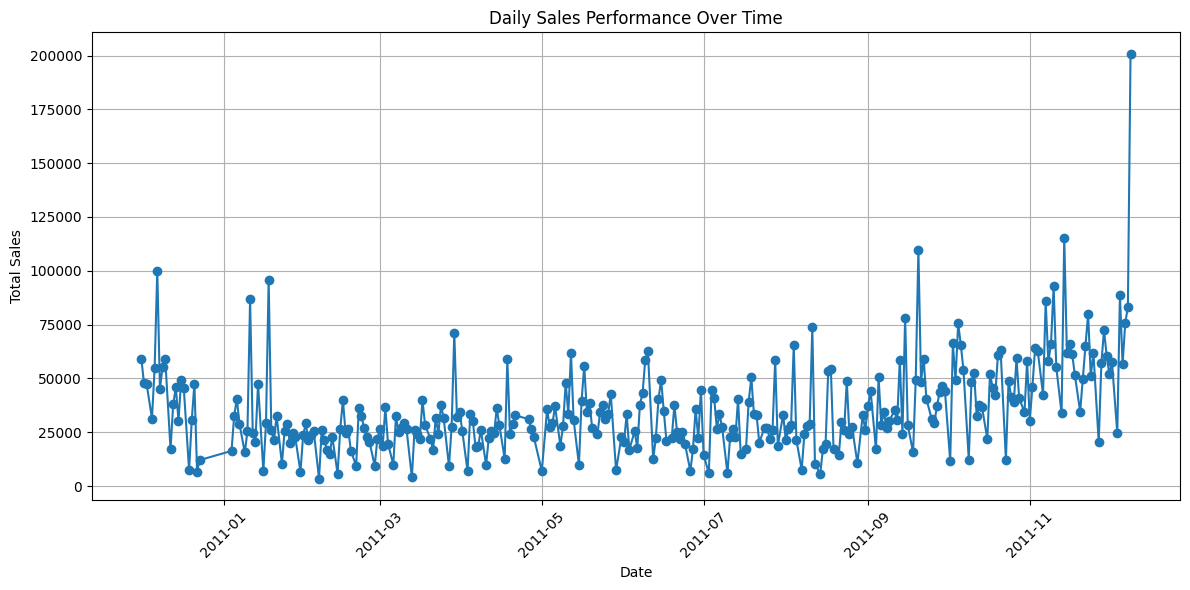

In [245]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['InvoiceDate'], daily_sales['TotalSales'], marker='o')
plt.title('Daily Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [246]:
monthly_sales

,InvoiceDate,TotalSales
0,1,712908.190
1,2,524376.790
2,3,733508.000
3,4,543361.551
4,5,795987.710
5,6,775197.150
6,7,731229.361
7,8,742562.850
8,9,1078888.213
9,10,1161924.160


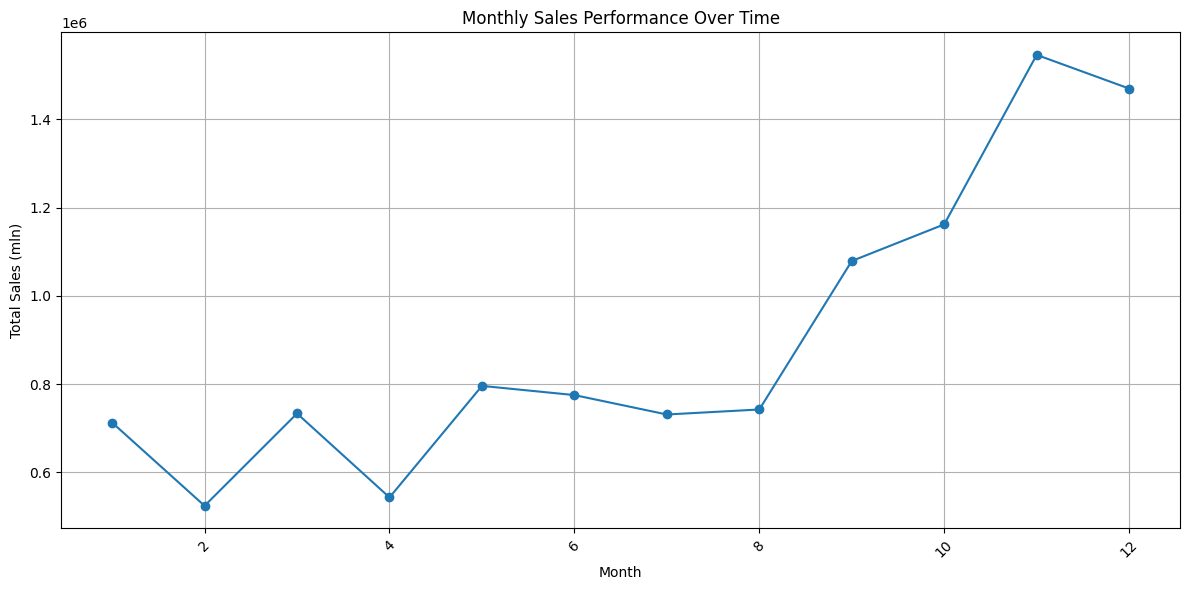

In [247]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceDate'], monthly_sales['TotalSales'], marker='o')
plt.title('Monthly Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales (mln)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [248]:
# Calculate average order value

sales_per_invoice = df.groupby('InvoiceNo')['TotalSales'].sum()
aov = sales_per_invoice.mean()

Product Performance Analysis

In [249]:
product_performance = df.groupby(['StockCode', 'Description'])[['TotalSales', 'Quantity']].sum().reset_index()
product_performance_by_quantity = product_performance.sort_values(by='Quantity', ascending=False)
product_performance_by_revenue = product_performance.sort_values(by='TotalSales', ascending=False)

In [250]:
top_products_by_revenue = product_performance_by_revenue.head(10)
top_products_by_revenue

,StockCode,Description,TotalSales,Quantity
4303,DOT,DOTCOM POSTAGE,209545.35,1708
1315,22423,REGENCY CAKESTAND 3 TIER,174296.79,13862
2685,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
4306,POST,POSTAGE,138401.88,6500
3922,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104296.04,37584
2770,47566,PARTY BUNTING,99465.03,18287
3909,85099B,JUMBO BAG RED RETROSPOT,94168.13,48375
2130,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92,78033
4304,M,Manual,77757.77,6990
2027,23084,RABBIT NIGHT LIGHT,68567.31,31555


In [251]:
top_products_by_quantity = product_performance_by_quantity.head(10)
top_products_by_quantity

,StockCode,Description,TotalSales,Quantity
2685,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,80995
2130,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92,78033
2877,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,13814.01,54951
3909,85099B,JUMBO BAG RED RETROSPOT,94168.13,48375
3922,85123A,WHITE HANGING HEART T-LIGHT HOLDER,104296.04,37584
1103,22197,POPCORN HOLDER,34288.67,36749
391,21212,PACK OF 72 RETROSPOT CAKE CASES,21246.45,36396
2983,84879,ASSORTED COLOUR BIRD ORNAMENT,58927.62,36362
2027,23084,RABBIT NIGHT LIGHT,68567.31,31555
1381,22492,MINI PAINT SET VINTAGE,16937.82,26633


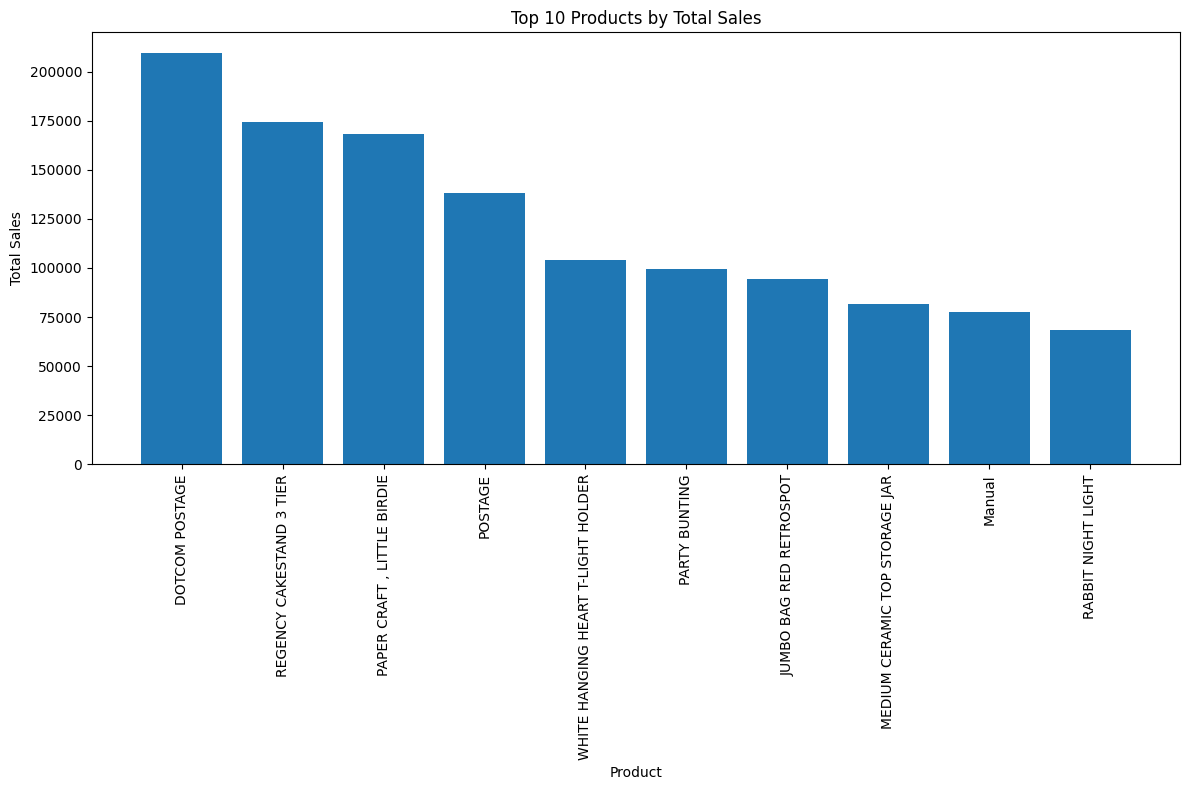

In [252]:
plt.figure(figsize=(12, 8))
plt.bar(top_products_by_revenue['Description'], top_products_by_revenue['TotalSales'])
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

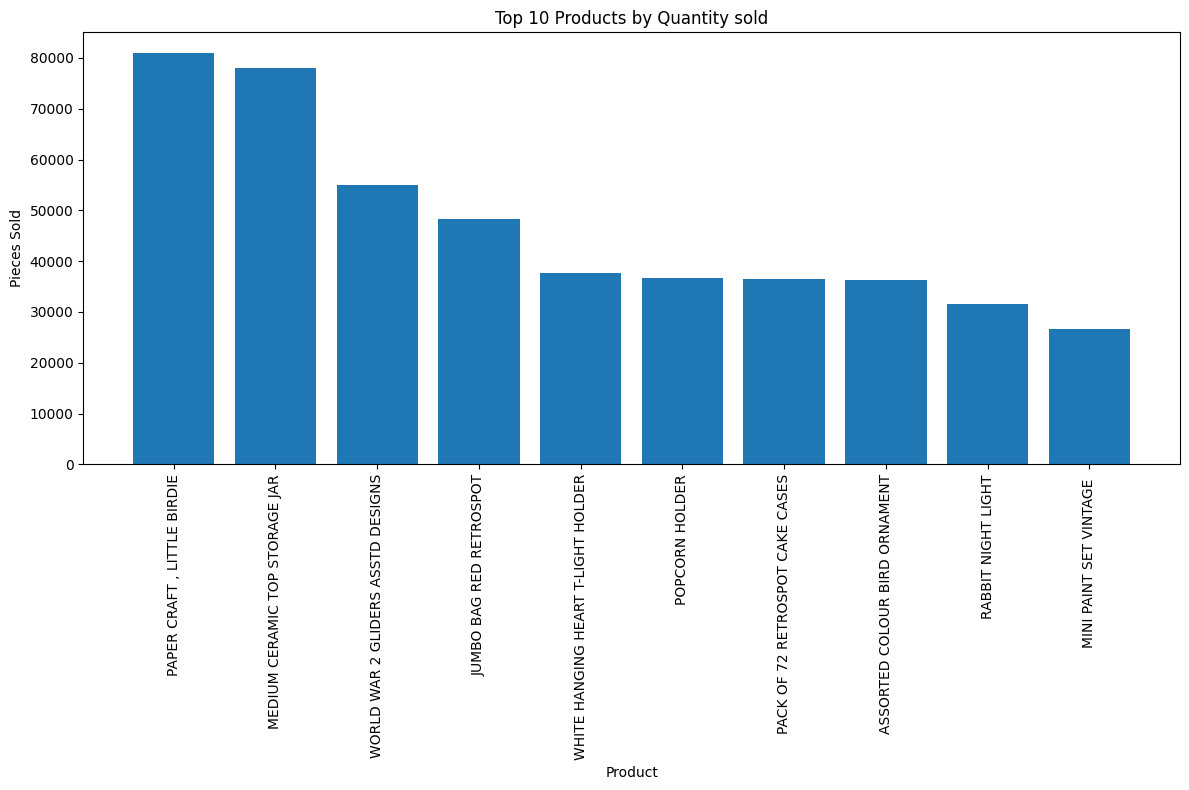

In [253]:
plt.figure(figsize=(12, 8))
plt.bar(top_products_by_quantity['Description'], top_products_by_quantity['Quantity'])
plt.title('Top 10 Products by Quantity sold')
plt.xlabel('Product')
plt.ylabel('Pieces Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [254]:
# Create a YearMonth column for grouping by month

df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

top_product_codes = top_products_by_revenue['StockCode']
top_products_sales = df[(df['StockCode'].isin(top_product_codes) & df['Description'].isin(top_products_by_revenue['Description']))]
monthly_sales = top_products_sales.groupby(['YearMonth', 'StockCode', 'Description'])['TotalSales'].sum().reset_index()
pivot_table = monthly_sales.pivot_table(index='YearMonth', columns='Description', values='TotalSales', fill_value=0)

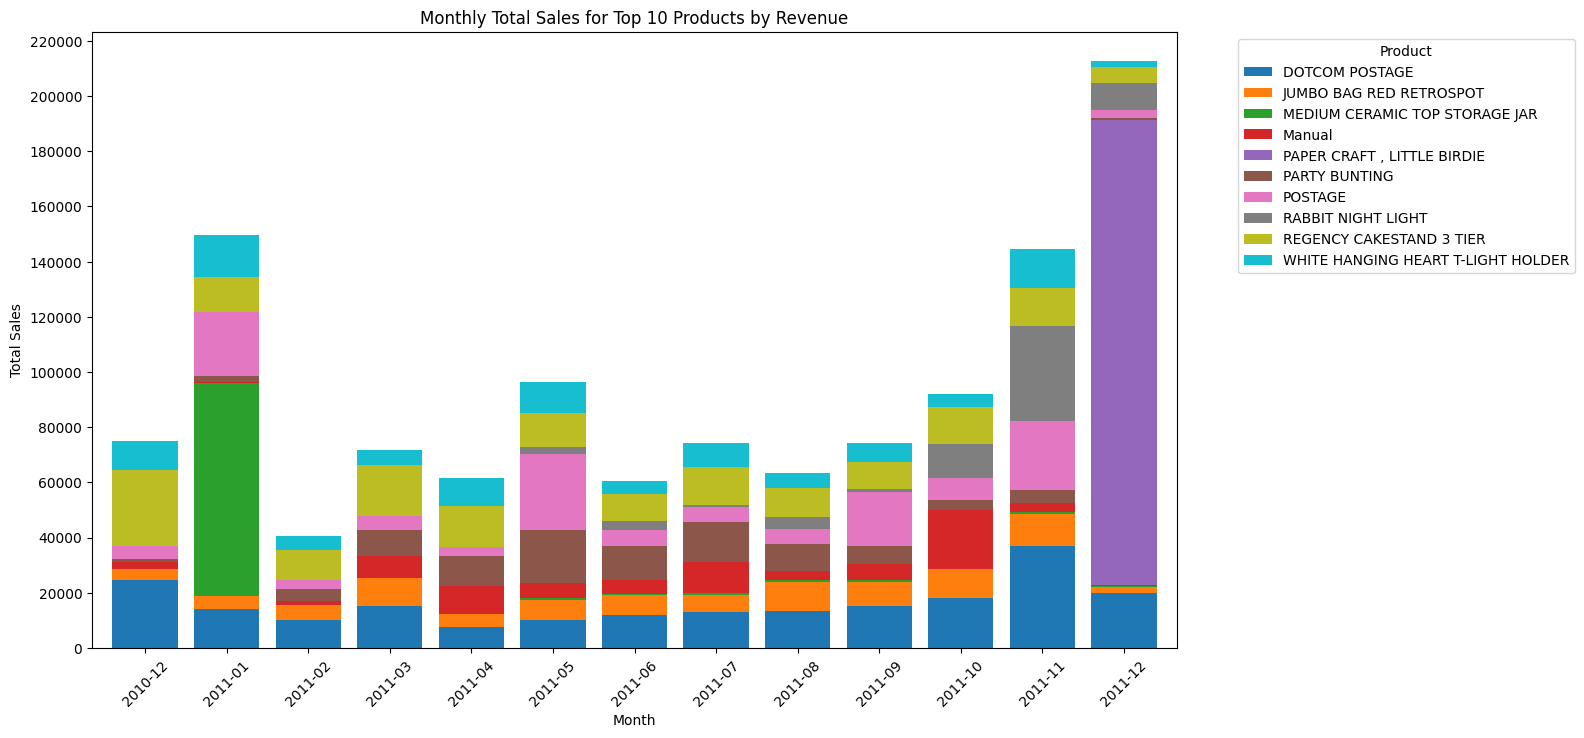

In [255]:
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
y_max = pivot_table.max().max() 
yticks = np.arange(0, y_max + 60000, step=20000)

plt.title('Monthly Total Sales for Top 10 Products by Revenue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.yticks(yticks)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [256]:
top_product_codes = top_products_by_quantity['StockCode']
top_products_sales = df[(df['StockCode'].isin(top_product_codes) & df['Description'].isin(top_products_by_revenue['Description']))]
monthly_sales = top_products_sales.groupby(['YearMonth', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
pivot_table = monthly_sales.pivot_table(index='YearMonth', columns='Description', values='Quantity', fill_value=0)

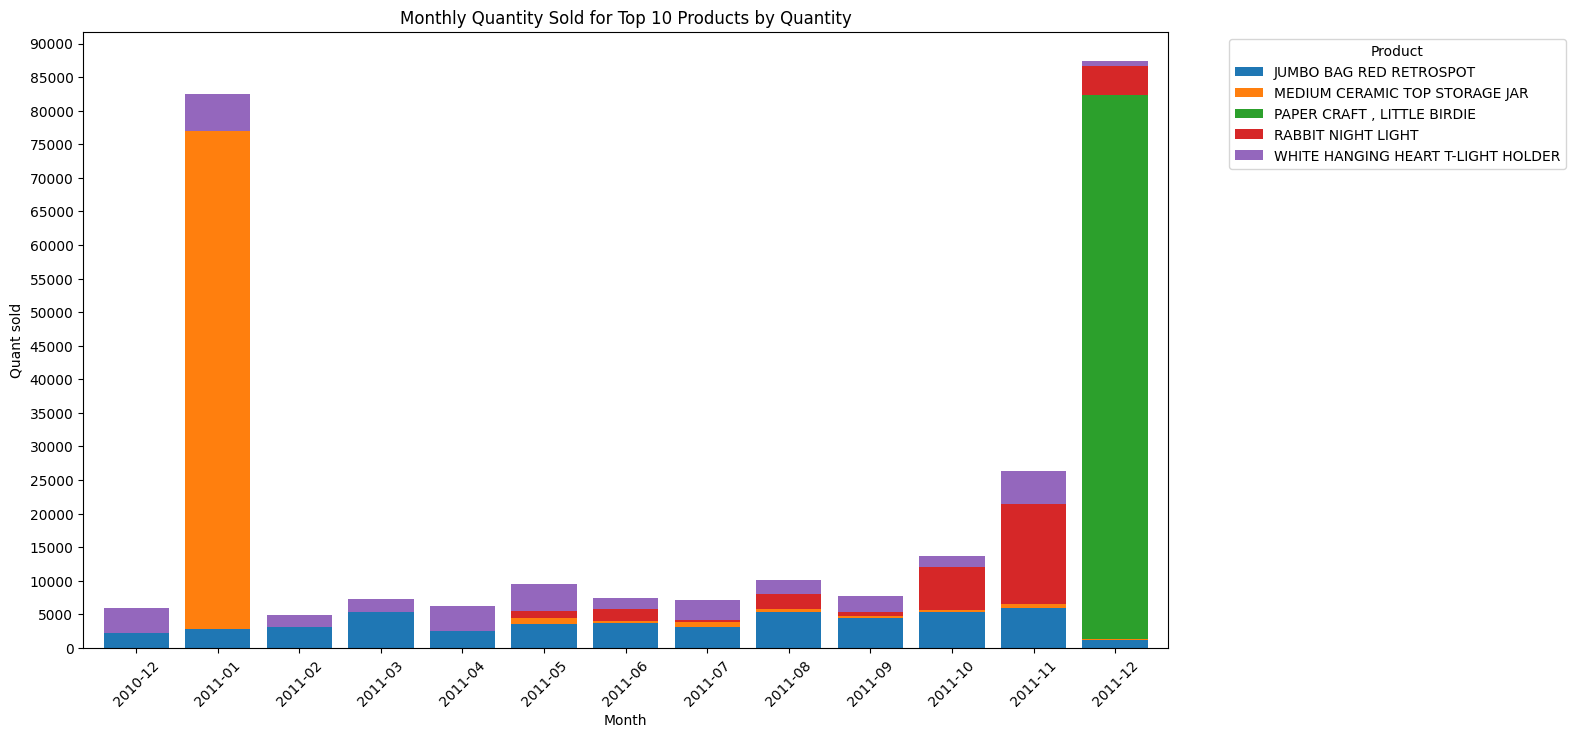

In [257]:
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
y_max = pivot_table.max().max()  
yticks = np.arange(0, y_max + 10000, step=5000)

plt.title('Monthly Quantity Sold for Top 10 Products by Quantity')
plt.xlabel('Month')
plt.ylabel('Quant sold')
plt.xticks(rotation=45)
plt.yticks(yticks)
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()

plt.show()

Geographical Sales Analysis

In [258]:
# Group by country and calculate total sales and total quantity sold
country_sales = df.groupby('Country')[['TotalSales', 'Quantity']].sum().reset_index()

# Sort by TotalSales to get the countries with the highest revenue
country_sales_sorted = country_sales.sort_values(by='TotalSales', ascending=False)

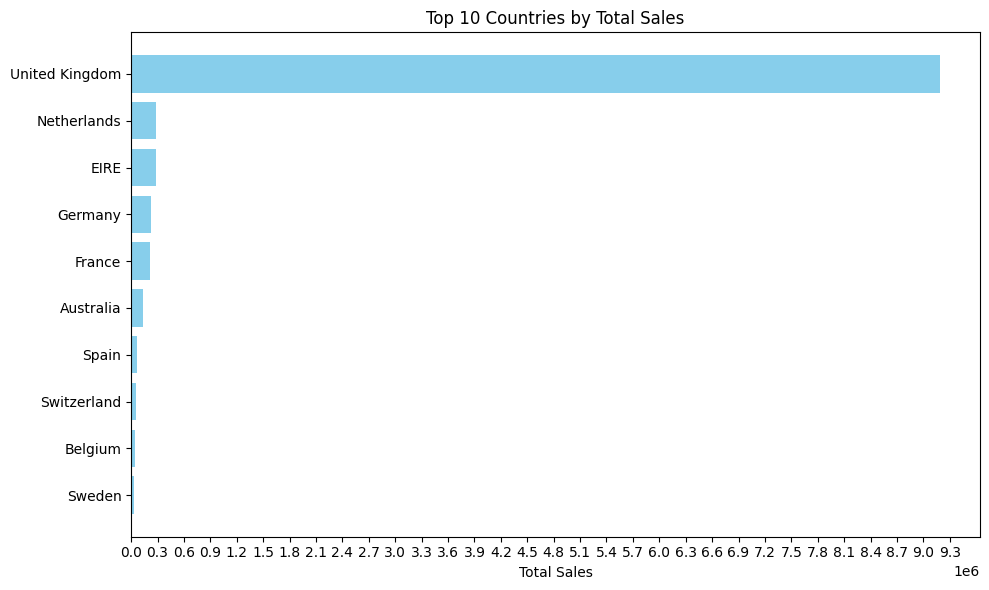

In [259]:
top_countries = country_sales_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_countries['Country'], top_countries['TotalSales'], color='skyblue')

# Set labels and title
plt.xlabel('Total Sales')
plt.title('Top 10 Countries by Total Sales')

y_max = top_countries['TotalSales'].max()

step_size = 300000 
yticks = np.arange(0, y_max + step_size, step=step_size)

plt.xticks(yticks)  
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()